<a href="https://colab.research.google.com/github/tejas05in/pwskills-Data_Science_Masters/blob/master/Deep_Learning/assignments/25_May_Batch_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`BATCH NORMALIZATION`**

Q1. Theory and Concepts


1. Explain the concept of batch normalization in the context of Artificial Neural Networks.

Batch normalization is a technique used in Artificial Neural Networks (ANNs) to improve the training and performance of deep learning models. It aims to address the problem of internal covariate shift, which refers to the change in the distribution of intermediate layer activations during training.

In ANNs, each layer's inputs are dependent on the parameters of the previous layers, causing the distributions of the inputs to change as the network learns. This shift in distributions can make the learning process more challenging, as each layer must continually adapt to the changing input distribution.

Batch normalization helps to alleviate this issue by normalizing the inputs of each layer. It operates on a mini-batch of training examples within a neural network. Here's a high-level overview of how batch normalization works:

1. Normalization: For each mini-batch of training examples, the mean and standard deviation of the batch are computed.
2. Standardization: The inputs of the mini-batch are normalized by subtracting the mean and dividing by the standard deviation. This step centers the inputs around zero and scales them to have unit variance.
3. Scaling and shifting: The normalized inputs are then multiplied by a learnable scaling parameter (gamma) and added to a learnable shifting parameter (beta). These parameters allow the network to learn the optimal scale and shift for each normalized input.

By normalizing the inputs, batch normalization helps to reduce the internal covariate shift. This has several advantages:

1. Improved training speed: Normalizing the inputs of each layer helps to stabilize the learning process, allowing for faster convergence. It reduces the likelihood of vanishing or exploding gradients, which are common issues in deep networks.
2. Increased learning rate: With batch normalization, higher learning rates can be used, as the normalization step helps to keep the activations within a reasonable range.
3. Regularization effect: Batch normalization adds a slight amount of noise to the network during training, similar to dropout regularization. This noise acts as a regularizer and can help prevent overfitting.
4. Reduces the sensitivity to network initialization: Batch normalization makes ANNs less sensitive to the choice of initial weights and biases, which can simplify the process of network initialization.

It's worth noting that during the inference or evaluation phase, batch normalization operates slightly differently. Instead of normalizing the inputs based on the mini-batch statistics, it uses the aggregated statistics (mean and variance) collected during training. This ensures consistency and allows the network to generalize well to unseen examples.

Overall, batch normalization has become a standard technique in deep learning due to its ability to improve training stability, convergence speed, and generalization performance.

2. Describe the benefits of using batch normalization during training.

Using batch normalization during training offers several benefits, which contribute to improved training stability and faster convergence of neural networks. Here are the main advantages:

1. **Reduced internal covariate shift**: Batch normalization addresses the problem of internal covariate shift by normalizing the inputs of each layer. This helps to stabilize the distributions of intermediate layer activations during training. By reducing the shift in distributions, batch normalization enables more stable and consistent learning throughout the network.

2. **Improved gradient flow**: Deep neural networks are prone to the vanishing or exploding gradient problem, which hinders the training process. Batch normalization helps mitigate these issues by normalizing the inputs to each layer. By keeping the activations within a reasonable range (zero mean and unit variance), batch normalization ensures that gradients flow more smoothly through the network, enabling better weight updates.

3. **Higher learning rates**: With batch normalization, higher learning rates can be used without the risk of divergence. Normalizing the inputs makes them less sensitive to the choice of learning rate. This allows for faster convergence and reduces the overall training time.

4. **Regularization effect**: Batch normalization adds a slight amount of noise to the network during training. This noise acts as a regularizer, similar to techniques like dropout. It helps to reduce overfitting by adding robustness and preventing the network from relying too heavily on specific features or patterns in the data.

5. **Reduced dependence on weight initialization**: The performance of deep networks can be highly dependent on the initial weights and biases. However, batch normalization reduces this sensitivity to initialization. By normalizing the inputs, batch normalization makes the network less sensitive to the initial parameter values. This simplifies the process of network initialization and allows for more straightforward hyperparameter tuning.

6. **Generalization improvement**: Batch normalization has been observed to improve the generalization performance of neural networks. By normalizing the inputs and reducing the internal covariate shift, batch normalization encourages the network to learn more robust and transferable features. This can lead to better performance on unseen examples and improved generalization to new data.

3 Discuss the working principle of batch normalization, including the normalization step and the learnable
parameters.

Certainly! The working principle of batch normalization involves two main steps: normalization and the use of learnable parameters. Let's break down each step:

1. **Normalization Step**: The normalization step in batch normalization aims to transform the inputs of each layer to have zero mean and unit variance, within a mini-batch of training examples. Here's how it works:

   a. **Compute batch statistics**: For each mini-batch during training, the mean (μ) and standard deviation (σ) of the batch are calculated by averaging the values across all the examples in the mini-batch.

   b. **Normalize the inputs**: The inputs of the mini-batch are then normalized by subtracting the mean and dividing by the standard deviation. This step ensures that the inputs are centered around zero (mean) and have a unit standard deviation.

   c. **Scale and shift**: After normalization, the normalized inputs are rescaled and shifted using learnable parameters. This step introduces flexibility into the normalization process and allows the network to learn the optimal scale and shift for each normalized input.

2. **Learnable Parameters**: Batch normalization introduces two learnable parameters per feature dimension, which are responsible for scaling and shifting the normalized inputs. These parameters are:

   a. **Scaling parameter (gamma)**: The scaling parameter, denoted as γ, is a learnable parameter associated with each feature dimension. It is applied to the normalized inputs and controls the scale or magnitude of the activations.

   b. **Shifting parameter (beta)**: The shifting parameter, denoted as β, is another learnable parameter associated with each feature dimension. It is added to the scaled and normalized inputs, allowing the network to learn the optimal shift or bias.

   These parameters, γ and β, are initialized with values of 1 and 0, respectively, and are updated during training using backpropagation, just like any other trainable parameter in the network.

During the forward pass, the batch normalization layer takes the mini-batch of inputs, calculates the mean and standard deviation, normalizes the inputs, and applies the scaling and shifting using the learnable parameters. The resulting normalized and transformed inputs are then passed to the next layer in the network.

It's important to note that during the inference or evaluation phase, the normalization step operates slightly differently. Instead of using the batch statistics, the aggregated statistics (mean and variance) collected during training are used to normalize the inputs. This ensures consistency and allows the network to generalize well to unseen examples.

In summary, batch normalization works by normalizing the inputs of each layer within a mini-batch using the mean and standard deviation. It then applies learnable scaling and shifting parameters to the normalized inputs, allowing the network to learn the optimal scale and shift for each feature dimension. This normalization step helps to address the problem of internal covariate shift and leads to improved training stability and faster convergence of neural networks.

**Q2. Impementation : using MINST dataset**

In [2]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [3]:
#checking version of tensorflow and keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.12.0
Keras Version 2.12.0


In [4]:
os.getcwd()

'/content'

# Creating a simple classifier using keras on MNIST data

In [5]:
mnist = tf.keras.datasets.mnist

In [6]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [7]:
(X_train_full, y_train_full) , (X_test , y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [10]:
print(X_train_full.shape)
print(X_test.shape)
print(X_train_full[0].shape)

(60000, 28, 28)
(10000, 28, 28)
(28, 28)


In [11]:
# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255 as its an unsigned data between 0-255 range
X_valid , X_train = X_train_full[:5000] / 255.,X_train_full[5000:]/255.
y_valid , y_train = y_train_full[:5000],y_train_full[5000:]

#scale the test set as well
X_test = X_test / 255.

In [12]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(55000, 28, 28)
(5000, 28, 28)
(10000, 28, 28)


<Axes: >

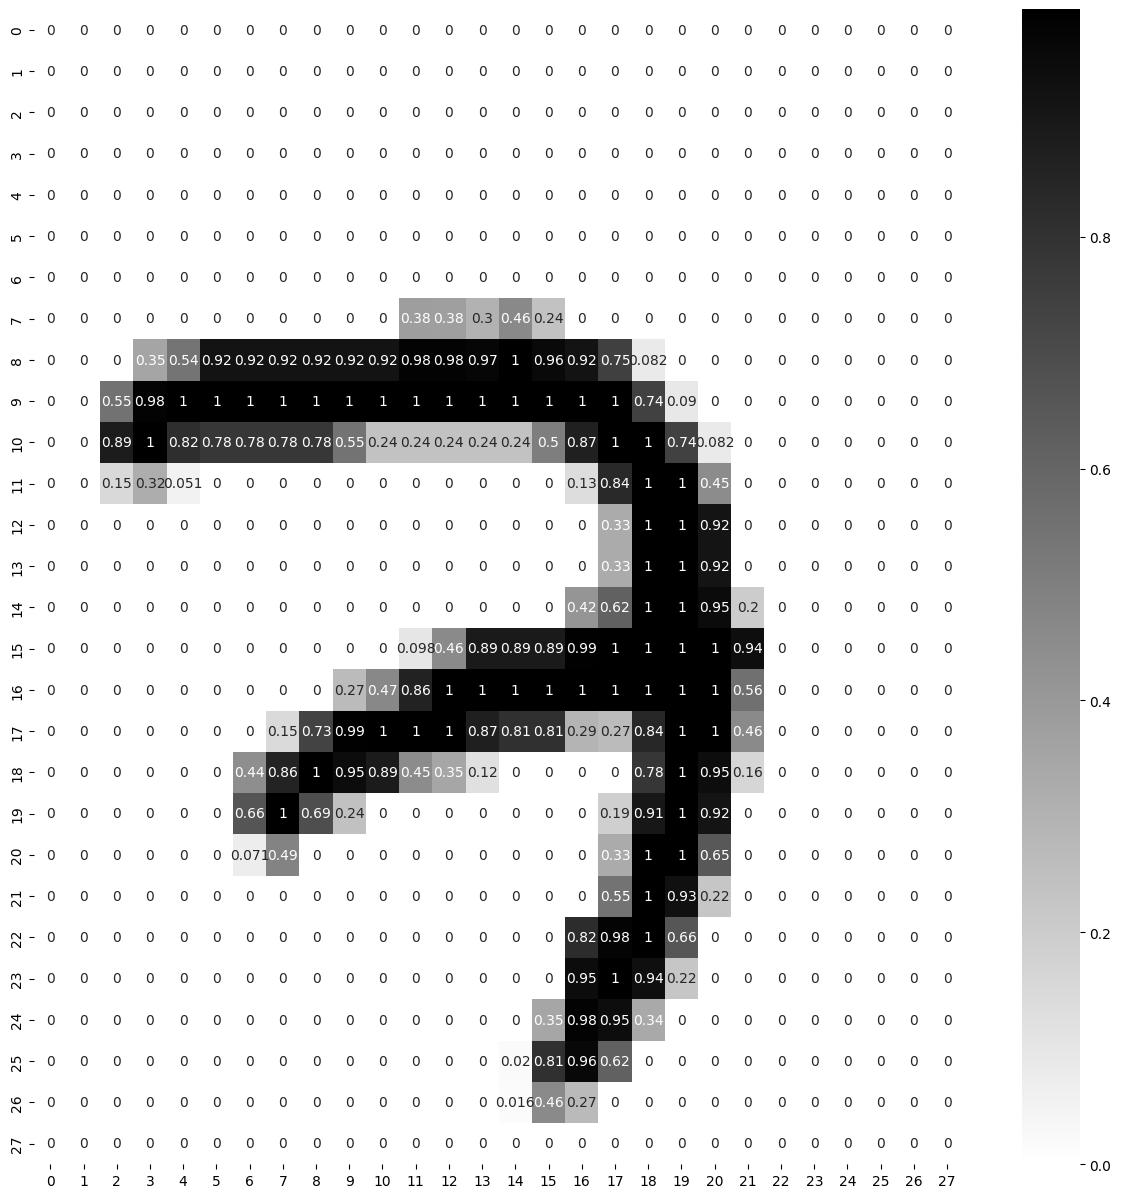

In [13]:
# viewing the first data
plt.figure(figsize = (15,15))
sns.heatmap(X_train[0],annot = True , cmap = 'binary')

In [15]:
#input layer shape
28*28

784

simple feedforward neural network without batch normalization

In [16]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28], name = 'inputLayer'),
          tf.keras.layers.Dense(300 , activation = 'relu' , name = "hiddenLayer1"),
          tf.keras.layers.Dense(100 , activation = "relu" , name = 'hiddenLayer2'),
          tf.keras.layers.Dense(10, activation = "softmax" , name = "outputLayer")]
model_clf = tf.keras.models.Sequential(LAYERS)

In [17]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [19]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid , y_valid)

history = model_clf.fit(X_train , y_train , epochs = EPOCHS,
                        validation_data= VALIDATION_SET , batch_size = 32)

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6176 - accuracy: 0.8430 - val_loss: 0.3004 - val_accuracy: 0.9184
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2863 - accuracy: 0.9193 - val_loss: 0.2341 - val_accuracy: 0.9342
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2336 - accuracy: 0.9340 - val_loss: 0.2008 - val_accuracy: 0.9438
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1993 - accuracy: 0.9445 - val_loss: 0.1761 - val_accuracy: 0.9522
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1733 - accuracy: 0.9509 - val_loss: 0.1526 - val_accuracy: 0.9578
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1533 - accuracy: 0.9566 - val_loss: 0.1401 - val_accuracy: 0.9608
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1366 - accuracy: 0.9615 - val_loss: 0.1285 - val_accur

In [20]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.617562,0.843000,0.300375,0.9184
1,0.286348,0.919273,0.234077,0.9342
2,0.233571,0.933982,0.200770,0.9438
3,0.199348,0.944455,0.176052,0.9522
4,0.173349,0.950855,0.152601,0.9578
5,0.153349,0.956582,0.140140,0.9608
6,0.136563,0.961455,0.128510,0.9638
7,0.123285,0.965145,0.121078,0.9666
8,0.112536,0.967836,0.112013,0.9684
9,0.102619,0.970855,0.103501,0.9704


<Axes: >

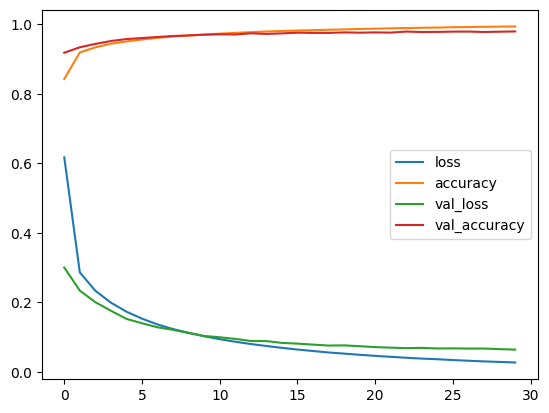

In [21]:
pd.DataFrame(history.history).plot()

In [22]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0686 - accuracy: 0.9785


[0.06856197863817215, 0.9785000085830688]

## Insights: Without batch normalization the model has attained a loss of 0.06 and accuracy of 0.978.
## The training accuracy is 0.994 and the validation accuracy is 0.979 (possibiltiy of overfitting)

Implementing batch normalization

In [24]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28], name = 'inputLayer'),
          tf.keras.layers.Dense(300 , activation = 'relu' , name = "hiddenLayer1"),
          tf.keras.layers.BatchNormalization(), #batch normalization layer
          tf.keras.layers.Dense(100 , activation = "relu" , name = 'hiddenLayer2'),
          tf.keras.layers.BatchNormalization(), #batch normalization layer
          tf.keras.layers.Dense(10, activation = "softmax" , name = "outputLayer")]
model_bn_clf = tf.keras.models.Sequential(LAYERS)

In [25]:
model_bn_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization (BatchN  (None, 300)              1200      
 ormalization)                                                   
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 outputLayer (Dense)         (None, 10)               

In [26]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_bn_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [27]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid , y_valid)

history_bn = model_bn_clf.fit(X_train , y_train , epochs = EPOCHS,
                        validation_data= VALIDATION_SET , batch_size = 32)

Epoch 1/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3271 - accuracy: 0.9051 - val_loss: 0.1554 - val_accuracy: 0.9576
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1590 - accuracy: 0.9543 - val_loss: 0.1159 - val_accuracy: 0.9668
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1209 - accuracy: 0.9654 - val_loss: 0.0974 - val_accuracy: 0.9718
Epoch 4/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.0956 - accuracy: 0.9716 - val_loss: 0.0911 - val_accuracy: 0.9734
Epoch 5/30
1719/1719 [==============================] - 17s 10ms/step - loss: 0.0786 - accuracy: 0.9777 - val_loss: 0.0818 - val_accuracy: 0.9756
Epoch 6/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.0660 - accuracy: 0.9812 - val_loss: 0.0773 - val_accuracy: 0.9752
Epoch 7/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.0559 - accuracy: 0.9843 - val_loss: 0.0787 - val_a

In [28]:
pd.DataFrame(history_bn.history)

,loss,accuracy,val_loss,val_accuracy
0,0.327109,0.905109,0.155410,0.9576
1,0.159010,0.954309,0.115860,0.9668
2,0.120888,0.965418,0.097438,0.9718
3,0.095573,0.971600,0.091095,0.9734
4,0.078578,0.977655,0.081764,0.9756
5,0.065969,0.981182,0.077328,0.9752
6,0.055902,0.984327,0.078714,0.9762
7,0.048919,0.985982,0.076438,0.9764
8,0.041159,0.988582,0.074121,0.9774
9,0.037211,0.989673,0.070490,0.9776


<Axes: >

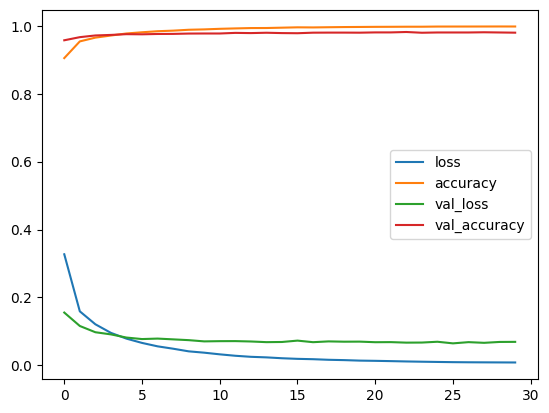

In [29]:
pd.DataFrame(history_bn.history).plot()

In [30]:
model_bn_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.0728 - accuracy: 0.9792


[0.07282879203557968, 0.979200005531311]

## **Insights: With batch normalization the model has attained a loss of 0.07 and accuracy of 0.979. Even though the loss was more (0.06 without batch normalization) the accuracy has shown a marginal improvement (0.978 without batch normalization).**
## **The training accuracy is 0.998 and the validation accuracy is 0.98**
## **From the plot above it is quiet evident that the model is able to converge much faster with batch normalization**

Discuss the impact of batch normalization on the training process and the performance of the neural network.

Ans: Batch normalization has a significant impact on the training process and the performance of neural networks. Here's a discussion of the key effects of batch normalization:

1. **Improved Training Speed**: Batch normalization helps accelerate the training process. By reducing the internal covariate shift and stabilizing the distributions of intermediate layer activations, batch normalization enables more consistent and efficient learning. The networks converge faster, allowing for shorter training times.

2. **Better Gradient Flow**: Deep neural networks often suffer from vanishing or exploding gradients, which can hinder training. Batch normalization addresses this issue by normalizing the inputs of each layer. By keeping the activations within a reasonable range (zero mean and unit variance), batch normalization helps gradients flow more smoothly through the network. This facilitates better weight updates and leads to improved training stability.

3. **Higher Learning Rates**: With batch normalization, higher learning rates can be used without the risk of divergence. Normalizing the inputs makes them less sensitive to the choice of learning rate. This ability to use higher learning rates allows the network to converge more quickly, accelerating the training process.

4. **Regularization Effect**: Batch normalization acts as a form of regularization during training. It introduces a slight amount of noise to the network, similar to techniques like dropout. This noise helps prevent overfitting by adding robustness to the network and discouraging the reliance on specific features or patterns in the data. As a result, batch normalization can improve the generalization performance of the neural network.

5. **Reduced Dependence on Weight Initialization**: The performance of deep networks can be highly sensitive to the initial weights and biases. However, batch normalization reduces this sensitivity. By normalizing the inputs, batch normalization makes the network less dependent on the initial parameter values. This simplifies the process of network initialization and reduces the effort required for finding optimal weight initializations.

6. **Increased Robustness to Network Architectures**: Batch normalization has been shown to make neural networks more robust to variations in network architectures. It helps networks handle variations in depth, width, and activation functions more effectively. This flexibility allows for easier experimentation and optimization of network architectures.

7. **Mitigation of Internal Covariate Shift**: Batch normalization effectively addresses the problem of internal covariate shift. By normalizing the inputs of each layer, it reduces the change in distributions during training. This stability in distributions helps networks learn more effectively and makes them less sensitive to changes in the input data.

Overall, batch normalization has a positive impact on the training process and the performance of neural networks. It accelerates training, improves gradient flow, allows for higher learning rates, acts as a regularization technique, reduces sensitivity to weight initialization, increases robustness to network architectures, and mitigates internal covariate shift. These benefits contribute to more stable and efficient training, leading to improved performance of the neural network.

**Q3. Experimentation and Analysis**

1. Experiment with different batch sizes and observe the effect on the training dynamics and model performance.

Ans:We have already seen the results with batch normalization and a batch size of 32. We shall now experiment with 3 different arbitrary batch sizes of 16 , 50 and 100 and reduce the epochs to 10 (to speed up the process) and study the effects

In [ ]:
# batch size 16

In [47]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28], name = 'inputLayer'),
          tf.keras.layers.Dense(300 , activation = 'relu' , name = "hiddenLayer1"),
          tf.keras.layers.BatchNormalization(), #batch normalization layer
          tf.keras.layers.Dense(100 , activation = "relu" , name = 'hiddenLayer2'),
          tf.keras.layers.BatchNormalization(), #batch normalization layer
          tf.keras.layers.Dense(10, activation = "softmax" , name = "outputLayer")]
model_bn_clf = tf.keras.models.Sequential(LAYERS)

In [48]:
model_bn_clf.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization_2 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 batch_normalization_3 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 outputLayer (Dense)         (None, 10)               

In [49]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_bn_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [50]:
# training with a batch size of 16

EPOCHS = 10
VALIDATION_SET = (X_valid , y_valid)

history_16 = model_bn_clf.fit(X_train , y_train , epochs = EPOCHS,
                        validation_data= VALIDATION_SET , batch_size = 16)

Epoch 1/10
3438/3438 [==============================] - 20s 5ms/step - loss: 0.3100 - accuracy: 0.9073 - val_loss: 0.1287 - val_accuracy: 0.9630
Epoch 2/10
3438/3438 [==============================] - 17s 5ms/step - loss: 0.1658 - accuracy: 0.9507 - val_loss: 0.0968 - val_accuracy: 0.9712
Epoch 3/10
3438/3438 [==============================] - 19s 5ms/step - loss: 0.1234 - accuracy: 0.9639 - val_loss: 0.0783 - val_accuracy: 0.9770
Epoch 4/10
3438/3438 [==============================] - 17s 5ms/step - loss: 0.1026 - accuracy: 0.9692 - val_loss: 0.0735 - val_accuracy: 0.9764
Epoch 5/10
3438/3438 [==============================] - 19s 6ms/step - loss: 0.0888 - accuracy: 0.9727 - val_loss: 0.0684 - val_accuracy: 0.9768
Epoch 6/10
3438/3438 [==============================] - 17s 5ms/step - loss: 0.0770 - accuracy: 0.9759 - val_loss: 0.0697 - val_accuracy: 0.9792
Epoch 7/10
3438/3438 [==============================] - 17s 5ms/step - loss: 0.0670 - accuracy: 0.9791 - val_loss: 0.0646 - val_ac

In [52]:
predict_16 = model_bn_clf.evaluate(X_test,y_test)
print(predict_16)

313/313 [==============================] - 1s 4ms/step - loss: 0.0662 - accuracy: 0.9789
[0.06622440367937088, 0.9789000153541565]


In [53]:
# batch size 50

In [54]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28], name = 'inputLayer'),
          tf.keras.layers.Dense(300 , activation = 'relu' , name = "hiddenLayer1"),
          tf.keras.layers.BatchNormalization(), #batch normalization layer
          tf.keras.layers.Dense(100 , activation = "relu" , name = 'hiddenLayer2'),
          tf.keras.layers.BatchNormalization(), #batch normalization layer
          tf.keras.layers.Dense(10, activation = "softmax" , name = "outputLayer")]
model_bn_clf = tf.keras.models.Sequential(LAYERS)

In [55]:
model_bn_clf.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization_4 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 batch_normalization_5 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 outputLayer (Dense)         (None, 10)               

In [56]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_bn_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [57]:
# training with a batch size of 50

EPOCHS = 10
VALIDATION_SET = (X_valid , y_valid)

history_50 = model_bn_clf.fit(X_train , y_train , epochs = EPOCHS,
                        validation_data= VALIDATION_SET , batch_size = 50)

Epoch 1/10
1100/1100 [==============================] - 9s 7ms/step - loss: 0.3678 - accuracy: 0.8922 - val_loss: 0.1772 - val_accuracy: 0.9522
Epoch 2/10
1100/1100 [==============================] - 9s 9ms/step - loss: 0.1819 - accuracy: 0.9475 - val_loss: 0.1322 - val_accuracy: 0.9640
Epoch 3/10
1100/1100 [==============================] - 9s 9ms/step - loss: 0.1374 - accuracy: 0.9606 - val_loss: 0.1138 - val_accuracy: 0.9678
Epoch 4/10
1100/1100 [==============================] - 8s 7ms/step - loss: 0.1089 - accuracy: 0.9687 - val_loss: 0.1039 - val_accuracy: 0.9694
Epoch 5/10
1100/1100 [==============================] - 8s 8ms/step - loss: 0.0903 - accuracy: 0.9750 - val_loss: 0.0948 - val_accuracy: 0.9724
Epoch 6/10
1100/1100 [==============================] - 9s 8ms/step - loss: 0.0765 - accuracy: 0.9791 - val_loss: 0.0865 - val_accuracy: 0.9746
Epoch 7/10
1100/1100 [==============================] - 7s 6ms/step - loss: 0.0654 - accuracy: 0.9819 - val_loss: 0.0861 - val_accuracy:

In [59]:
predict_50 = model_bn_clf.evaluate(X_test,y_test)
print(predict_50)

313/313 [==============================] - 2s 7ms/step - loss: 0.0791 - accuracy: 0.9759
[0.07913430780172348, 0.9758999943733215]


In [60]:
# batch size 100

In [61]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28], name = 'inputLayer'),
          tf.keras.layers.Dense(300 , activation = 'relu' , name = "hiddenLayer1"),
          tf.keras.layers.BatchNormalization(), #batch normalization layer
          tf.keras.layers.Dense(100 , activation = "relu" , name = 'hiddenLayer2'),
          tf.keras.layers.BatchNormalization(), #batch normalization layer
          tf.keras.layers.Dense(10, activation = "softmax" , name = "outputLayer")]
model_bn_clf = tf.keras.models.Sequential(LAYERS)

In [62]:
model_bn_clf.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization_6 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 batch_normalization_7 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 outputLayer (Dense)         (None, 10)               

In [63]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_bn_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [64]:
# training with a batch size of 100

EPOCHS = 10
VALIDATION_SET = (X_valid , y_valid)

history_100 = model_bn_clf.fit(X_train , y_train , epochs = EPOCHS,
                        validation_data= VALIDATION_SET , batch_size = 100)

Epoch 1/10
550/550 [==============================] - 5s 8ms/step - loss: 0.4637 - accuracy: 0.8656 - val_loss: 0.2379 - val_accuracy: 0.9360
Epoch 2/10
550/550 [==============================] - 5s 9ms/step - loss: 0.2203 - accuracy: 0.9378 - val_loss: 0.1723 - val_accuracy: 0.9522
Epoch 3/10
550/550 [==============================] - 4s 8ms/step - loss: 0.1701 - accuracy: 0.9527 - val_loss: 0.1461 - val_accuracy: 0.9596
Epoch 4/10
550/550 [==============================] - 5s 8ms/step - loss: 0.1416 - accuracy: 0.9608 - val_loss: 0.1319 - val_accuracy: 0.9646
Epoch 5/10
550/550 [==============================] - 5s 9ms/step - loss: 0.1216 - accuracy: 0.9672 - val_loss: 0.1213 - val_accuracy: 0.9670
Epoch 6/10
550/550 [==============================] - 4s 8ms/step - loss: 0.1065 - accuracy: 0.9715 - val_loss: 0.1131 - val_accuracy: 0.9698
Epoch 7/10
550/550 [==============================] - 5s 9ms/step - loss: 0.0940 - accuracy: 0.9749 - val_loss: 0.1065 - val_accuracy: 0.9700
Epoch 

In [65]:
predict_100 = model_bn_clf.evaluate(X_test,y_test)
print(predict_100)

313/313 [==============================] - 2s 4ms/step - loss: 0.0942 - accuracy: 0.9731
[0.09415649622678757, 0.9731000065803528]


In [66]:
df_16 = pd.DataFrame(history_16.history)
df_50 = pd.DataFrame(history_50.history)
df_100 = pd.DataFrame(history_100.history)

<Axes: title={'center': 'batch size 16'}>

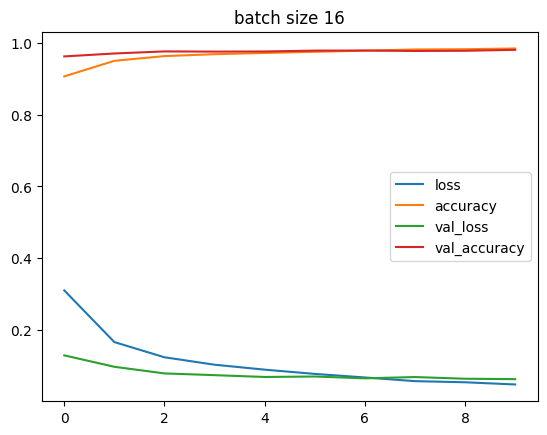

In [67]:
df_16.plot(title="batch size 16")

<Axes: title={'center': 'batch size 50'}>

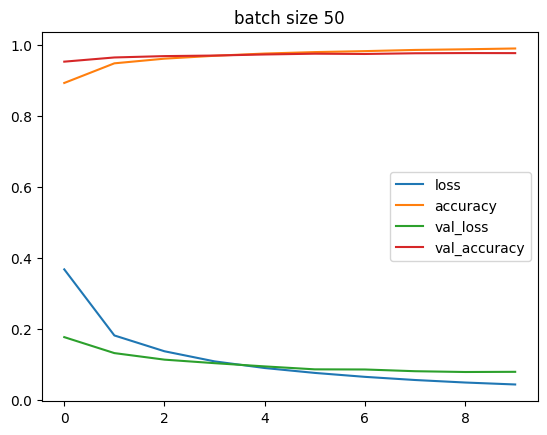

In [68]:
df_50.plot(title="batch size 50")

<Axes: title={'center': 'batch size 100'}>

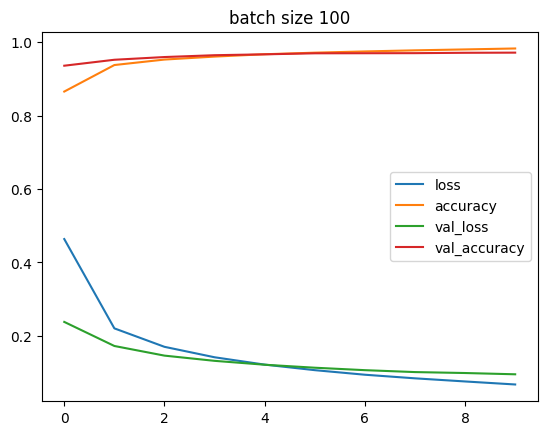

In [69]:
df_100.plot(title="batch size 100")

In [79]:
# combining the prediction results for different batch sizes
final_predictions = pd.DataFrame([predict_16,predict_50,predict_100],columns=('loss','accuracy'),index=('batch_16','batch_50','batch_100'))
final_predictions

,loss,accuracy
batch_16,0.066224,0.9789
batch_50,0.079134,0.9759
batch_100,0.094156,0.9731


# **Conclusions from the experiment**
1. Increasing the batch size resulted in an increase in loss and a fall in accuracy
2. The gradients took a longer time to converge with increase in batch size
3. Whereas increase in batch size reduced the traning time significantly as batch of 16 resulted in longest training time
4. Even with Batch Normalization employeed smaller batch size yielded better reuslts

In summary we can see that batch size is a hyperparameter which when reduced leads to a higher accuracy and greater reduction in loss but the training time increases significantly for a large dataset.

Please note: The epoch size was limited to 10 for this expirement and increasing the epoch size will definitely alter the results by producing better outcomes.

2. Discuss the advantages and potential limitations of batch normalization in improving the training of neural networks.

Batch normalization offers several advantages in improving the training of neural networks. However, it is also important to consider potential limitations. Let's discuss both the advantages and potential limitations of batch normalization:

Advantages of Batch Normalization:

1. **Improved Training Stability**: Batch normalization reduces the internal covariate shift, stabilizing the distribution of intermediate layer activations during training. This leads to more stable and consistent learning, making the training process less sensitive to the choice of hyperparameters.

2. **Faster Convergence**: By addressing the vanishing and exploding gradient problems, batch normalization improves the flow of gradients through the network. This enables faster convergence, reducing the training time required to achieve a desired level of performance.

3. **Higher Learning Rates**: Batch normalization allows for the use of higher learning rates without the risk of divergence. Normalizing the inputs makes them less sensitive to the learning rate, enabling faster convergence and better exploration of the weight space.

4. **Regularization Effect**: Batch normalization acts as a regularizer by adding a slight amount of noise to the network during training. This noise helps prevent overfitting and improves the generalization performance of the neural network.

5. **Reduced Dependency on Weight Initialization**: Batch normalization makes neural networks less sensitive to the choice of weight initialization. This reduces the effort required for finding optimal weight initializations and makes the training process more robust.

Potential Limitations of Batch Normalization:

1. **Batch Size Dependency**: Batch normalization computes statistics based on mini-batches of training examples. Very small batch sizes can lead to noisy estimates of mean and variance, which can affect the normalization process. Therefore, larger batch sizes generally yield better results with batch normalization.

2. **Inference Mode**: The behavior of batch normalization during the inference or evaluation phase is different from training. The aggregated statistics (mean and variance) collected during training are used instead of mini-batch statistics. This introduces a slight mismatch between training and inference, although it generally does not have a significant impact on performance.

3. **Added Computational Overhead**: Batch normalization introduces additional computations during training, including the calculation of mean, variance, normalization, and scaling/shifting operations. This can increase the computational cost of training, especially for large networks.

4. **Limited Applicability to Small Datasets**: Batch normalization's effectiveness is more pronounced when training on large datasets. In scenarios where the dataset is small, the mini-batch statistics might not accurately represent the overall data distribution, potentially impacting the normalization process.

5. **Dependency on Network Architecture**: While batch normalization generally works well with various network architectures, it may not always be beneficial or suitable for certain types of networks, such as recurrent neural networks (RNNs) or generative adversarial networks (GANs). In such cases, alternative normalization techniques tailored to specific architectures may be more appropriate.

It's worth noting that many of the limitations can be mitigated or managed with proper experimentation, hyperparameter tuning, and understanding of the specific characteristics of the dataset and network architecture.

Despite the potential limitations, batch normalization remains a widely used technique in deep learning due to its effectiveness in improving training stability, convergence speed, and generalization performance of neural networks.